In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
cd ..

/home/dhatri


In [4]:
cd Documents/UDEMY_TSA_FINAL/Data/

/home/dhatri/Documents/UDEMY_TSA_FINAL/Data


In [6]:
df = pd.read_csv("airline_passengers.csv", index_col='Month', parse_dates=True)

In [8]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
# To make sure that we're able to run statsmodels on this dataset,
# we need to set the frequency
df.index.freq = 'MS'

In [11]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [12]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [13]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [15]:
#train-test split
train_data = df.iloc[:109] #can do it by loc and the date index
test_data = df.iloc[108:]

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend = 'mul', seasonal = 'mul', 
                                   seasonal_periods = 12).fit()

/home/dhatri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [18]:
test_predictions = fitted_model.forecast(36)

In [19]:
test_predictions

1958-02-01    339.142941
1958-03-01    399.281668
1958-04-01    394.233601
1958-05-01    402.545250
1958-06-01    473.128718
1958-07-01    521.795295
1958-08-01    514.513614
1958-09-01    446.216848
1958-10-01    385.430985
1958-11-01    339.645128
1958-12-01    381.455693
1959-01-01    401.210192
1959-02-01    387.159190
1959-03-01    455.812427
1959-04-01    450.049649
1959-05-01    459.538071
1959-06-01    540.114828
1959-07-01    595.671675
1959-08-01    587.359045
1959-09-01    509.392745
1959-10-01    440.000748
1959-11-01    387.732477
1959-12-01    435.462631
1960-01-01    458.013994
1960-02-01    441.973634
1960-03-01    520.346876
1960-04-01    513.768197
1960-05-01    524.600002
1960-06-01    616.584908
1960-07-01    680.007559
1960-08-01    670.518017
1960-09-01    581.513157
1960-10-01    502.296562
1960-11-01    442.628088
1960-12-01    497.115932
1961-01-01    522.860144
Freq: MS, dtype: float64

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

<Axes: xlabel='Month'>

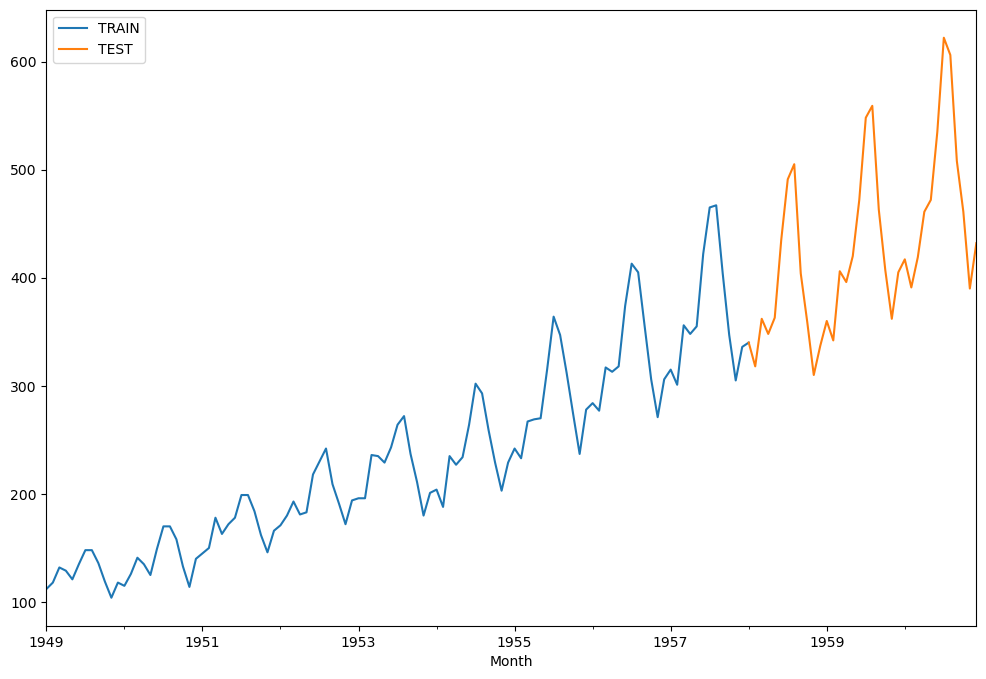

In [25]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

<Axes: xlabel='Month'>

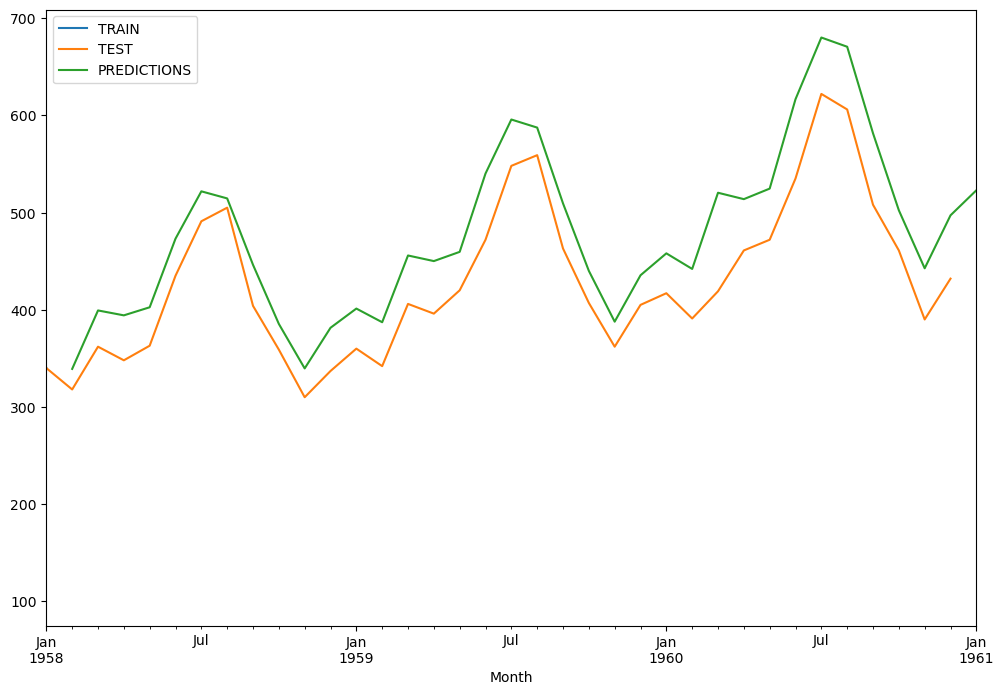

In [28]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTIONS', xlim=['1958-01-01', '1961-01-01'])

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
mean_absolute_error(test_data, test_predictions)

63.031142551517945

In [34]:
mean_squared_error(test_data, test_predictions)

5614.260861590254

In [36]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92837153969285

In [37]:
#re-train the model on the entire dataset because it's working well
# with the current parameters
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/home/dhatri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [38]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Month'>

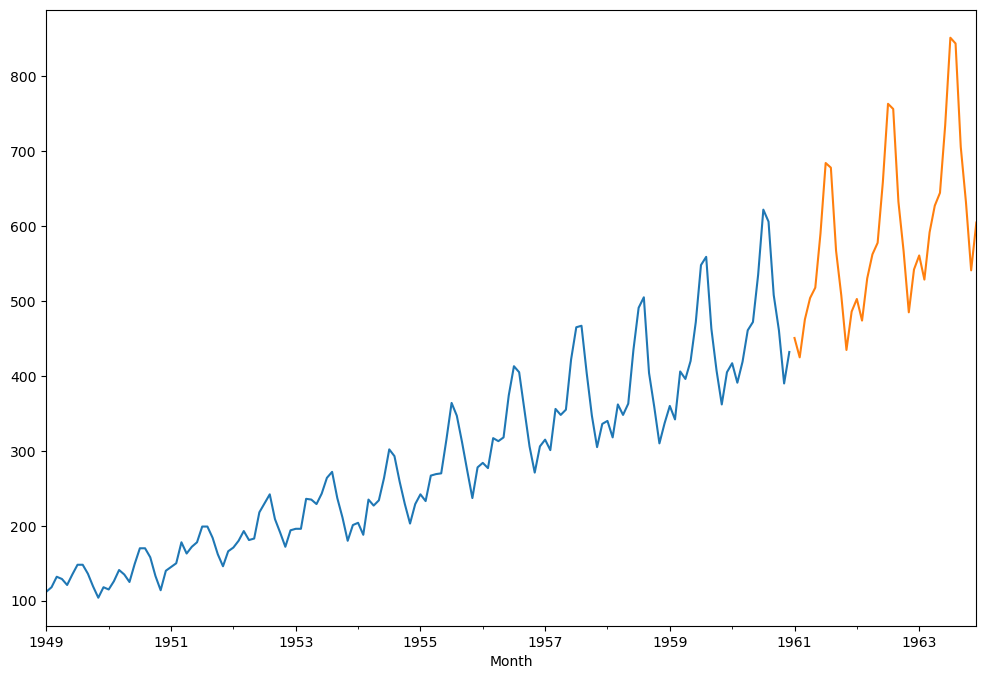

In [40]:
df['Thousands of Passengers'].plot()
forecast_predictions.plot()

In [42]:
df2 = pd.read_csv('samples.csv', index_col=0, parse_dates=True)

In [43]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<Axes: >

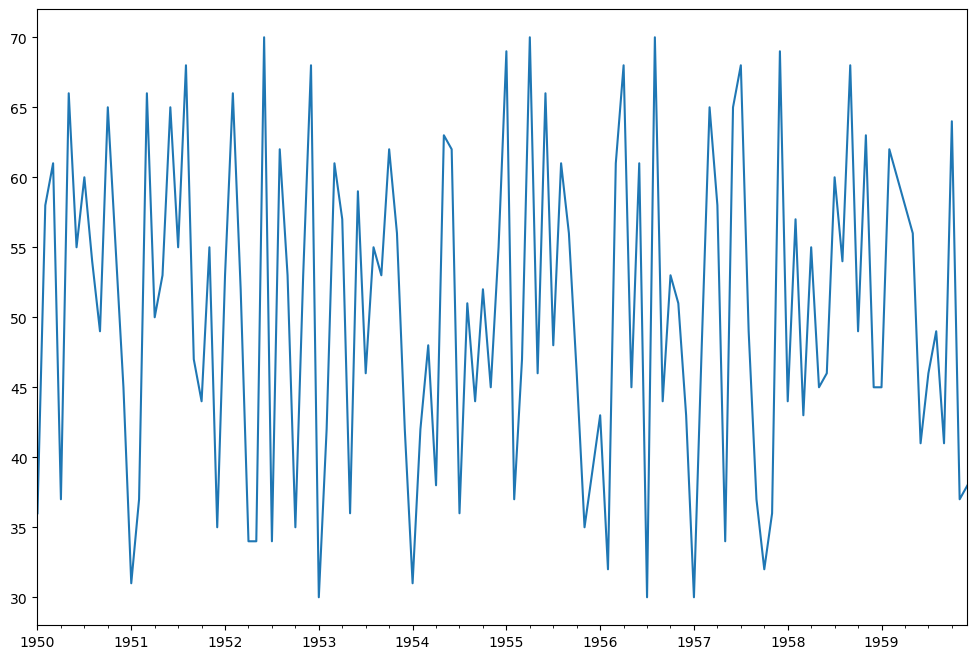

In [44]:
df2['a'].plot()

<Axes: >

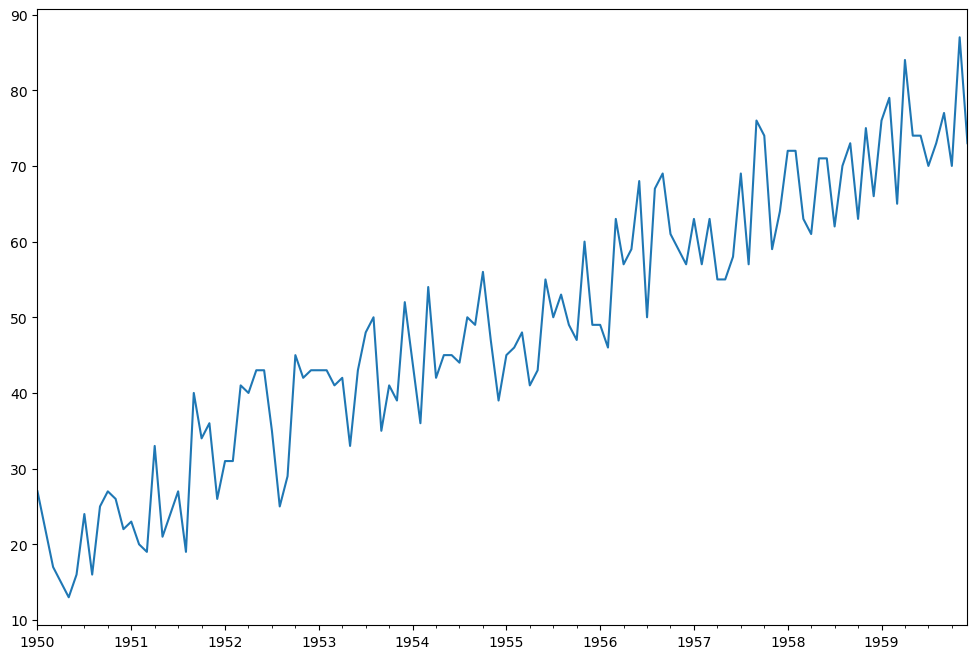

In [45]:
df2['b'].plot()

In [46]:
from statsmodels.tsa.statespace.tools import diff

In [50]:
# how to do it without statsmodels
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [49]:
diff(df2['b'], k_diff=1) # deos not show not a number (NaN)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<Axes: >

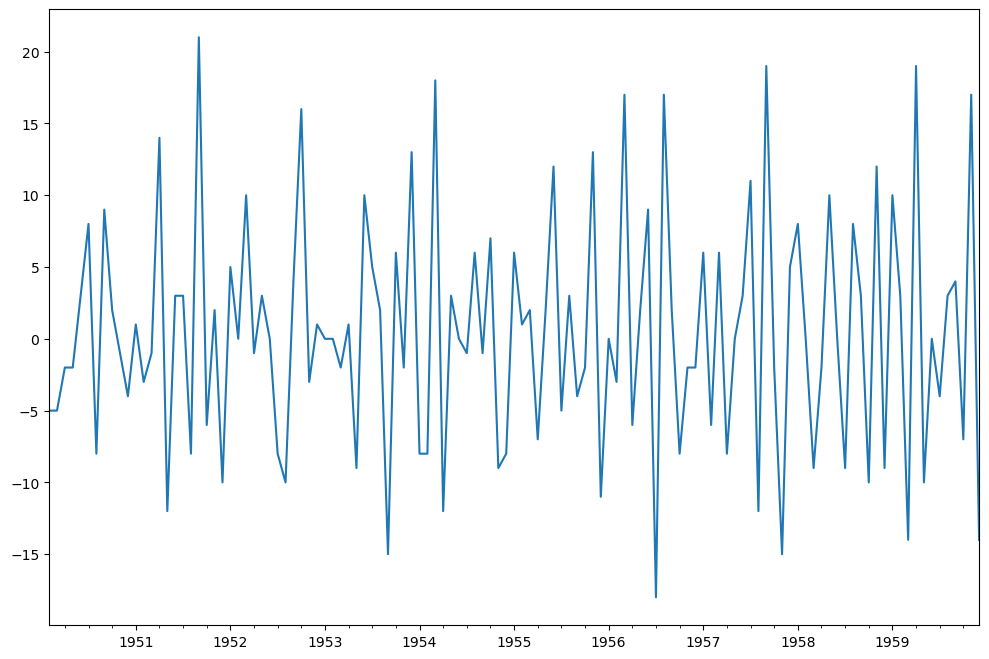

In [51]:
diff(df2['b'], k_diff=1).plot()